# 2. Data Cleaning
<br>
This notebook is the third of four in the Reddit API scrape and classification project.
EDA is performed on both the **Dad Jokes** and **ELI5** dataframes. The dataframes are combined, cleaned, and archived for purposes of classification modeling (performed in notebook #3).

#### Actions performed:
   - EDA on Dad Jokes dataframe
   - EDA on ELI5 dataframe
   - Dataframes combined and cleaned
   - Example posts selected

---

Import modules

In [1]:
# cleaning and processing tools
import pandas as pd
import numpy as np


## Import Dad Jokes dataframe; perform EDA

In [2]:
dad = pd.read_csv('../datasets/dad.csv')

In [3]:
print(dad.shape)
dad.head()

(3447, 10)


,name,title,selftext,subreddit,created,author,num_comments,ups,downs,score
0,t3_9zyjbd,"Today, my son asked ""Can I have a book mark?"" ...",NaN,dadjokes,1.543096e+09,ebkbk,185,38059,0,38059
1,t3_a6k9bp,I got the words “jacuzzi” and “yakuza” confused.,Now I’m in hot water with the Japanese mafia.,dadjokes,1.544947e+09,porichoygupto,175,20946,0,20946
2,t3_a1uxsk,Geology rocks but geography is where it's at,NaN,dadjokes,1.543631e+09,Tempsilon,166,16072,0,16072
3,t3_9yrxoh,I have a friend who was born on October 10th. ...,"It might be stupid, but 10/10 wood post again.",dadjokes,1.542748e+09,Maimonides_vii,215,15138,0,15138
4,t3_a2bjiz,"What word starts with ""e"", ends with ""e"", and ...",Envelope.,dadjokes,1.543766e+09,ENJOYblet,260,13281,0,13281


> Weird.. looks like the duplicates didn't get dropped in notebook #1 

I'll just do it again here.

In [4]:
dad = dad.drop_duplicates(['name'])
dad.shape

(1738, 10)

In [7]:
dad.dtypes

name             object
title            object
selftext         object
subreddit        object
created         float64
author           object
num_comments      int64
ups               int64
downs             int64
score             int64
dtype: object

**Examine authors with the most posts**

In [6]:
dad['author'].value_counts().head(10)

porichoygupto      117
TommehBoi           31
thomasbrakeline     29
madazzahatter       16
ENJOYblet           11
RageMonster17       10
manicmoose13         9
Mad_Chicken_         9
zhenggan3263         8
74CK                 7
Name: author, dtype: int64

- So this tells me that 10 individuals contributed 247 posts to the dad jokes subreddit
- That is ~14% of all posts in this subreddit scrape

**Examine posts  with the highest score**

In [7]:
dad['score'].sort_values(ascending = False).head(15)

0     38059
1     20946
2     16072
3     15138
4     13281
5     13223
6     12920
7     11992
8     11741
9     11612
10    11104
11    10363
12    10353
13    10337
14    10294
Name: score, dtype: int64

In [8]:
# these are the posts with the most upvotes
dad[dad['score'] >= 15000][['score', 'title']].sort_values(by = 'score', ascending=False)

,score,title
0,38059,"Today, my son asked ""Can I have a book mark?"" ..."
1,20946,I got the words “jacuzzi” and “yakuza” confused.
2,16072,Geology rocks but geography is where it's at
3,15138,I have a friend who was born on October 10th. ...


In [9]:
# dad[dad['score'] ==38059]
dad['title'][0]

'Today, my son asked "Can I have a book mark?" and I burst into tears. 11 years old and he still doesn\'t know my name is Brian.'

>The joke above had the most upvotes [\*cringe*]

**Examine posts w/ most comments**

In [10]:
dad['num_comments'].sort_values(ascending = False).head()

4     260
12    238
3     215
11    206
0     185
Name: num_comments, dtype: int64

In [11]:
#these are the posts with the most comments
dad[dad['num_comments'] >= 185]['title'].sort_values(ascending=False)

4     What word starts with "e", ends with "e", and ...
0     Today, my son asked "Can I have a book mark?" ...
12          The ultimate Dad Joke - Bulgarian Train Man
11    My calculus professor was 16 minutes late to h...
3     I have a friend who was born on October 10th. ...
Name: title, dtype: object

In [12]:
print(dad['title'][4])
print(dad['selftext'][4])

What word starts with "e", ends with "e", and only has one letter in it?
 Envelope. 


> The joke above had the most comments (260). I wonder why?!

**Verify that all the posts are from the dad jokes subreddit** (just in case!)

In [13]:
dad['subreddit'].value_counts()

dadjokes    1738
Name: subreddit, dtype: int64

**Are there any null values?**

In [14]:
dad.isnull().sum()

name              0
title             0
selftext        105
subreddit         0
created           0
author            0
num_comments      0
ups               0
downs             0
score             0
dtype: int64

## Import ELI5 dataframe; perform EDA

In [15]:
five = pd.read_csv("../datasets/eli5.csv")
five.head(3)

,name,title,selftext,subreddit,created,author,num_comments,ups,downs,score
0,t3_a02lyg,ELI5: Why is pi not infinite?,NaN,explainlikeimfive,1.543125e+09,UnidentifiedEcho,44,0,0,0
1,t3_80yrkb,ELI5: Ohm's law applies on alternate current t...,NaN,explainlikeimfive,1.519875e+09,Geeky_panda,6,0,0,0
2,t3_9e8hdw,Eli5- what legally distinguishes kidnapping fr...,NaN,explainlikeimfive,1.536478e+09,chriscroc420,13,0,0,0


In [16]:
five.shape

(12964, 10)

> Once again,  the duplicates didn't get dropped in notebook #2.

I'll do it again here.

In [17]:
five = five.drop_duplicates(['name'])
five.shape

(1521, 10)

**Are there any null values?**

In [18]:
five.isnull().sum()

name              0
title             0
selftext        791
subreddit         0
created           0
author            0
num_comments      0
ups               0
downs             0
score             0
dtype: int64

**Examine authors with the most posts**

In [19]:
five['name'].value_counts().head(5)
# so every 'name' is a unique id

t3_9ryrzy    1
t3_a6rr6o    1
t3_8j8hc0    1
t3_a75ijo    1
t3_916o9z    1
Name: name, dtype: int64

So this tells me that the 'name' column is a unique id for every post

In [20]:
five['author'].value_counts().head(10)

[deleted]             21
myfirstpanda           4
any_username_ideas     3
wentaas                3
mxzbzz                 3
questiondudes          3
YamiiYugii             3
Xeluc                  3
massivebrain           2
JoThePro10             2
Name: author, dtype: int64

> So in ELI5, there are much less repeat authors (26 total posts between 9 people, which is ~1.7% of the total posts.) Maybe people don't return with questions here because they learned how to use google instead!

In [22]:
five[five['author'] == 'myfirstpanda'][['title', 'score', 'num_comments' ]]

,title,score,num_comments
789,"ELI5: How does popcorn lung work, how is it co...",0,4
11358,"ELI5: In the UK, what does the title of sir ac...",4,10
11716,ELI5: Why are we usually fine with our own mes...,17,5
12817,ELI5: What do the numbers on the dials on radi...,2,0


**Examine highest scores**

In [23]:
five['score'].sort_values(ascending = False).head(10)

11212    15244
11207    13224
11601    10374
11326    10123
11699     9055
11484     7438
72        1651
11206      864
11593      828
464        483
Name: score, dtype: int64

>The highest scoring post has about half as many upvotes as the one in Dad jokes. People like to like jokes more than questions! [NOTE: this metric has not been verified because we don't know how long posts were up for]

**Examine posts with the most comments**

In [24]:
five['num_comments'].sort_values(ascending = False).head()

11212    1357
11207     945
72        603
11326     529
11484     428
Name: num_comments, dtype: int64

In [25]:
five[five['num_comments'] >= 400][['title', 'num_comments', 'score']].head(8)

,title,num_comments,score
72,ELI5: why don’t you hear about the history of ...,603,1651
11207,"ELI5: why do some letters like ""a"" or ""g"" look...",945,13224
11212,ELI5: Why does it seem like I look better in t...,1357,15244
11326,ELI5: Why was New York City so dangerous in th...,529,10123
11484,ELI5 why is there the two rows of elements tha...,428,7438
11699,ELI5: Why do URLs have %20 in them to represen...,403,9055


In [49]:
print(five['title'][72])
print(five['title'][11207])
print(five['title'][11212])
print(five['title'][11326])
print(five['title'][11484])

ELI5: why don’t you hear about the history of Africa before colonialism?
ELI5: why do some letters like "a" or "g" look different on a computer than when normally written?
ELI5: Why does it seem like I look better in the mirror than I do on a camera ?
ELI5: Why was New York City so dangerous in the 70s + 80s and how did it get that way?
ELI5 why is there the two rows of elements that don't fit in on the periodic table? How do these 20 or so elements fit into those two single spots?


> This question has the most active comments. People have opinions on this!

Not surprisingly, the ELI5 subreddit has much more comment activity going on than in dad jokes. 

In [27]:
five.loc[1,'title']

"ELI5: Ohm's law applies on alternate current till 220V but not further, why ?"

**Verify that all the posts are from the ELI5 subreddit** (just in case!)

In [28]:
five['subreddit'].value_counts()

explainlikeimfive    1521
Name: subreddit, dtype: int64

## Combine dataframes
-Cleaning Tasks to perform:
   - create a df w/ three columns: `name`, `title`, and `subreddit`
   - replace Nan values in `selftext` with ""
   - combine the `title` and `selftext` columns into a new column, `post`
   - turn `subreddit` into dummy column for 0 or 1 (0 = feminist, 1 = trans)
   
-Additional cleaning
   - remove any phrase 'ELI5' from the ELI5 posts

---

- *Combine ELI5 and Dad Jokes dataframes*

In [29]:
# combine the two dfs 
df = dad.append(five)

# reindex
df.reset_index(drop=True, inplace=True)
print(df.shape)
df.tail(3)

(3259, 10)


,name,title,selftext,subreddit,created,author,num_comments,ups,downs,score
3256,t3_a7vjcu,ELI5: Why did I hear voices whenever I had a f...,NaN,explainlikeimfive,1.545320e+09,12344321r,0,3,0,3
3257,t3_a7vjq5,ELI5: What even is a permanent record?,I’ve always head that your permanent record fo...,explainlikeimfive,1.545320e+09,lorrddd,0,1,0,1
3258,t3_a7vjjd,ELI5: What do the numbers on the dials on radi...,And what would be the most cost effective and ...,explainlikeimfive,1.545320e+09,myfirstpanda,0,2,0,2


- *Create dataframe with certain columns*
- *Binarize `subreddit` column*

In [30]:
df = df[["name", 'title', 'selftext','subreddit']]
df['subreddit'].value_counts()

dadjokes             1738
explainlikeimfive    1521
Name: subreddit, dtype: int64

In [31]:
# binarize subreddit column
df['subreddit'] = df['subreddit'].map({"dadjokes": 0, "explainlikeimfive": 1})
df['subreddit'].value_counts()

0    1738
1    1521
Name: subreddit, dtype: int64

- *Within `selftext`, replace the Nan values with punctuation, or " " (because when we combine title and selftext, some columns will have Nan)*

In [33]:
df.fillna("", inplace=True)
df.loc[[3256,]]

,name,title,selftext,subreddit
3256,t3_a7vjcu,ELI5: Why did I hear voices whenever I had a f...,,1


- *Combine the `title` and the `selftext` text into new column `post`*

In [34]:
df["post"] = df["title"].map(str) + " " + df["selftext"].map(str)

- *Drop the name column because we don't need it*

In [35]:
df.drop(columns=['name'], inplace=True)
df.tail()

,title,selftext,subreddit,post
3254,ELI5: A cop can test for alcohol with a breath...,,1,ELI5: A cop can test for alcohol with a breath...
3255,ELI5: What happens to the color in colored dri...,,1,ELI5: What happens to the color in colored dri...
3256,ELI5: Why did I hear voices whenever I had a f...,,1,ELI5: Why did I hear voices whenever I had a f...
3257,ELI5: What even is a permanent record?,I’ve always head that your permanent record fo...,1,ELI5: What even is a permanent record? I’ve al...
3258,ELI5: What do the numbers on the dials on radi...,And what would be the most cost effective and ...,1,ELI5: What do the numbers on the dials on radi...


- *Remove the "ELI5:" tag from all comments*

In [36]:
df.replace(to_replace="ELI5:", value="", regex=True, inplace=True)
df.replace(to_replace="ELI5", value="", regex=True, inplace=True)
df.replace(to_replace="ELi5", value="", regex=True, inplace=True)
df.tail()

,title,selftext,subreddit,post
3254,A cop can test for alcohol with a breathalyze...,,1,A cop can test for alcohol with a breathalyze...
3255,What happens to the color in colored drinks b...,,1,What happens to the color in colored drinks b...
3256,Why did I hear voices whenever I had a fever/...,,1,Why did I hear voices whenever I had a fever/...
3257,What even is a permanent record?,I’ve always head that your permanent record fo...,1,What even is a permanent record? I’ve always ...
3258,What do the numbers on the dials on radiators...,And what would be the most cost effective and ...,1,What do the numbers on the dials on radiators...


In [39]:
# save copy of cleaned dataframe and COMMENT OUT
# df.to_csv('../datasets/dad_five.csv', index = False)

### Find some good posts to use in presentation

In [40]:
len(df['post'])

3259

In [ ]:
# scroll through the comments and pick some examples to show for presentation

list = df.loc[0:3258, 'post']
# print(list)
for i in range(len(list)):
    print(i, list[i])
    print("--------")
  

In [50]:
list= [130, 134, 144, 145, 179, 16, 19, 29, 32, 684, 685, 686, 714, 715, 824, 1046, 1050, 1052, 1053, 1071, 1247, 
       1508, 1496, 1380, 1368, 1332, 1143, 1160, 1170 ]

for i in list:
    print(df['post'][i])


What kind of exercise do lazy people do? Diddly squats
What's the cutest season? Awwwtumn.
Dad body is just another way of saying... Father figure 
My son said he was going to read a book by the fire. I said, "That's a weird name for an author."
My wife texted me: “Why are you typing everything in lowercase?” Me: i stopped giving a shift.
My son wanted some girl advice, so I told him, “If you are intimidated by a date, remember one thing.” They are just big raisins.
Couples Therapist: So, tell me what brings you here today? Her: It’s really difficult to live with him. He is so literal.

Me: My truck.
Why are communist jokes so funny? Everyone gets it. 
What do you call a fight between a Martian and a nerd with no social life? Alien versus Redditor.
What do you call it when the Indian restaurant forgets your bread? It’s a naan issue.
What do fish smoke to get high? Seaweed
How many drugs did Charlie Sheen do? Enough to kill two and a half men. 
Harry, you are a Unit of Power! I‘m a Watt

In [45]:
list = [1787, 1803, 2068, 2165, 2169, 2178, 2190, 2398, 2390, 2402, 2465, 3224, 3024, 3030, 3016, 3013, 2862,
       2495, 2777, 2779, 2834, 2840]
for i in list:
    print(df['post'][i])


 Why do divers dive backwards into the sea? Thanks.. 
 How can be sound turned into digital? 
 Why doesn’t tape stick to itself on a roll? 
 What are romance languages and why are they "romantic"? 
 why are duck’s penises corkscrew shaped ? 
 Why do trucks always say that they take wide rights, but not lefts? 
 Why is Listerine not corrosive for the teeth but the chemicals in Coke is? 
 : What can't you taste the sweetness in drinks after eating something sweet? 
 Why do you sometimes react with smiling/laughing to shoking things? 
 What is the difference between movies and films? Also directors and filmmakers? 
 How can the original Jurassic Park made back in 1993 look more realistic than more modern movies? 
 Why is denture glue not permanent? A tv commercial I saw was boasting that their glue holds dentures in place for up to 13 hours. Can anyone explain why a permanent glue, like superglue, is inappropriate as a one time solution. 
 Why do women have PMS? It’s terribly uncomfortabl

### What are the word counts when I vectorize?

In [51]:
! pip install matplotlib

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import stop_words
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

%matplotlib inline

**Countvectorizer: What are the most common words when stopwords are included?**

In [71]:
vect = CountVectorizer() # Examine again with stop_words="english"
X = vect.fit_transform(df['post'])
text = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())
text.index = df['subreddit']
print(text[text.index == 0].sum().sort_values(ascending = False).head(10))
print('---------------')
print(text[text.index == 1].sum().sort_values(ascending = False).head(10))

the     1421
to       773
you      639
it       598
and      547
my       492
what     455
in       424
of       422
he       373
dtype: int64
---------------
the     2205
to      1256
and     1113
is      1056
why      994
it       991
of       918
in       794
how      722
that     633
dtype: int64


a) Graph of most common words in ELI5

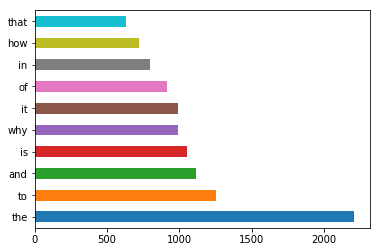

In [96]:
vect = CountVectorizer(ngram_range=(1, 1), 
#                        stop_words='english' 
                      ) # Examine again with stop_words="english"
X = vect.fit_transform(df['post'])
text = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())
text.index = df['subreddit']

text[text.index == 1].sum().sort_values(ascending=False).head(10).plot(kind="barh")

b) Graph of most common words in dad jokes

AxesSubplot(0.125,0.125;0.775x0.755)


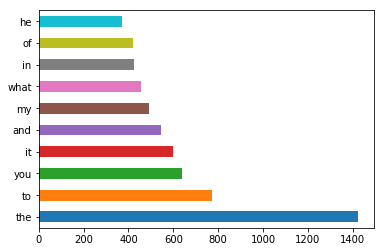

In [97]:
print(text[text.index == 0].sum().sort_values(ascending=False).head(10).plot(kind="barh"))

**TFID vectorizer: What are the most common words when stopwords are removed?**
<br>a) ELI5 posts

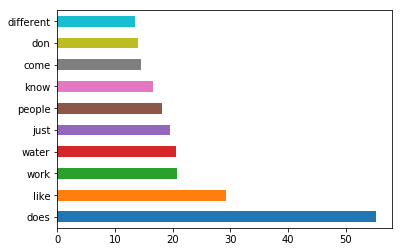

In [82]:
vect = TfidfVectorizer(stop_words="english")
X_text = vect.fit_transform(df['post'])
text = pd.DataFrame(X_text.toarray(), columns=vect.get_feature_names())
text.sum().sort_values(ascending=False)
text.index = df['subreddit']

# also good to examine
# text.max().sort_values(ascending=False)
# vect = CountVectorizer(ngram_range=(1, 1), stop_words='english' ) # Examine again with stop_words="english"
# X = vect.fit_transform(df['post'])
# text = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())
# text.index = df['subreddit']

text[text.index == 1].sum().sort_values(ascending=False).head(10).plot(kind="barh")

(b) for Dad jokes

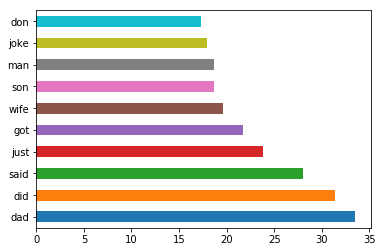

In [83]:
text[text.index == 0].sum().sort_values(ascending=False).head(10).plot(kind="barh")

**TFID vectorizer: What are the most common words when stopwords are left in?**
<br>a) ELI5 posts

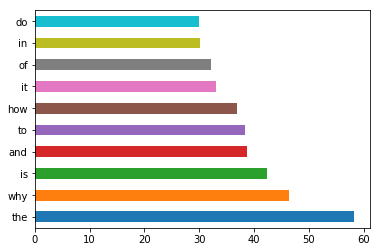

In [84]:
vect = TfidfVectorizer(ngram_range=(1,2))
X_text = vect.fit_transform(df['post'])
text = pd.DataFrame(X_text.toarray(), columns=vect.get_feature_names())
text.sum().sort_values(ascending=False)
text.index = df['subreddit']


text[text.index == 1].sum().sort_values(ascending=False).head(10).plot(kind="barh")

b) Dad jokes

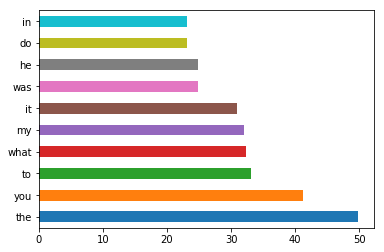

In [85]:
text[text.index == 0].sum().sort_values(ascending=False).head(10).plot(kind="barh")